# Phenotype data preprocessing
**FIXME: Hao, I am thinking this kind of notebook (that sits outside these folders) should be of a tutorial nature. It should only contain `sos run` commands interactively with enough text explanations. For those who want to run the default analysis they should work with `master_control.ipynb` and generate the commands to run as is. For those who want to customize the analysis, they should refer to each of these "recipe" and change the parameters here. That should cover 95% user cases. People will read the module notebooks only for learning purpose. For those who want to edit the module notebooks we will consider them developers or at least power users and I expect few of them.**

**This tutorial contains examples on running the pink,blue,purple, and green section of the following diagram.**

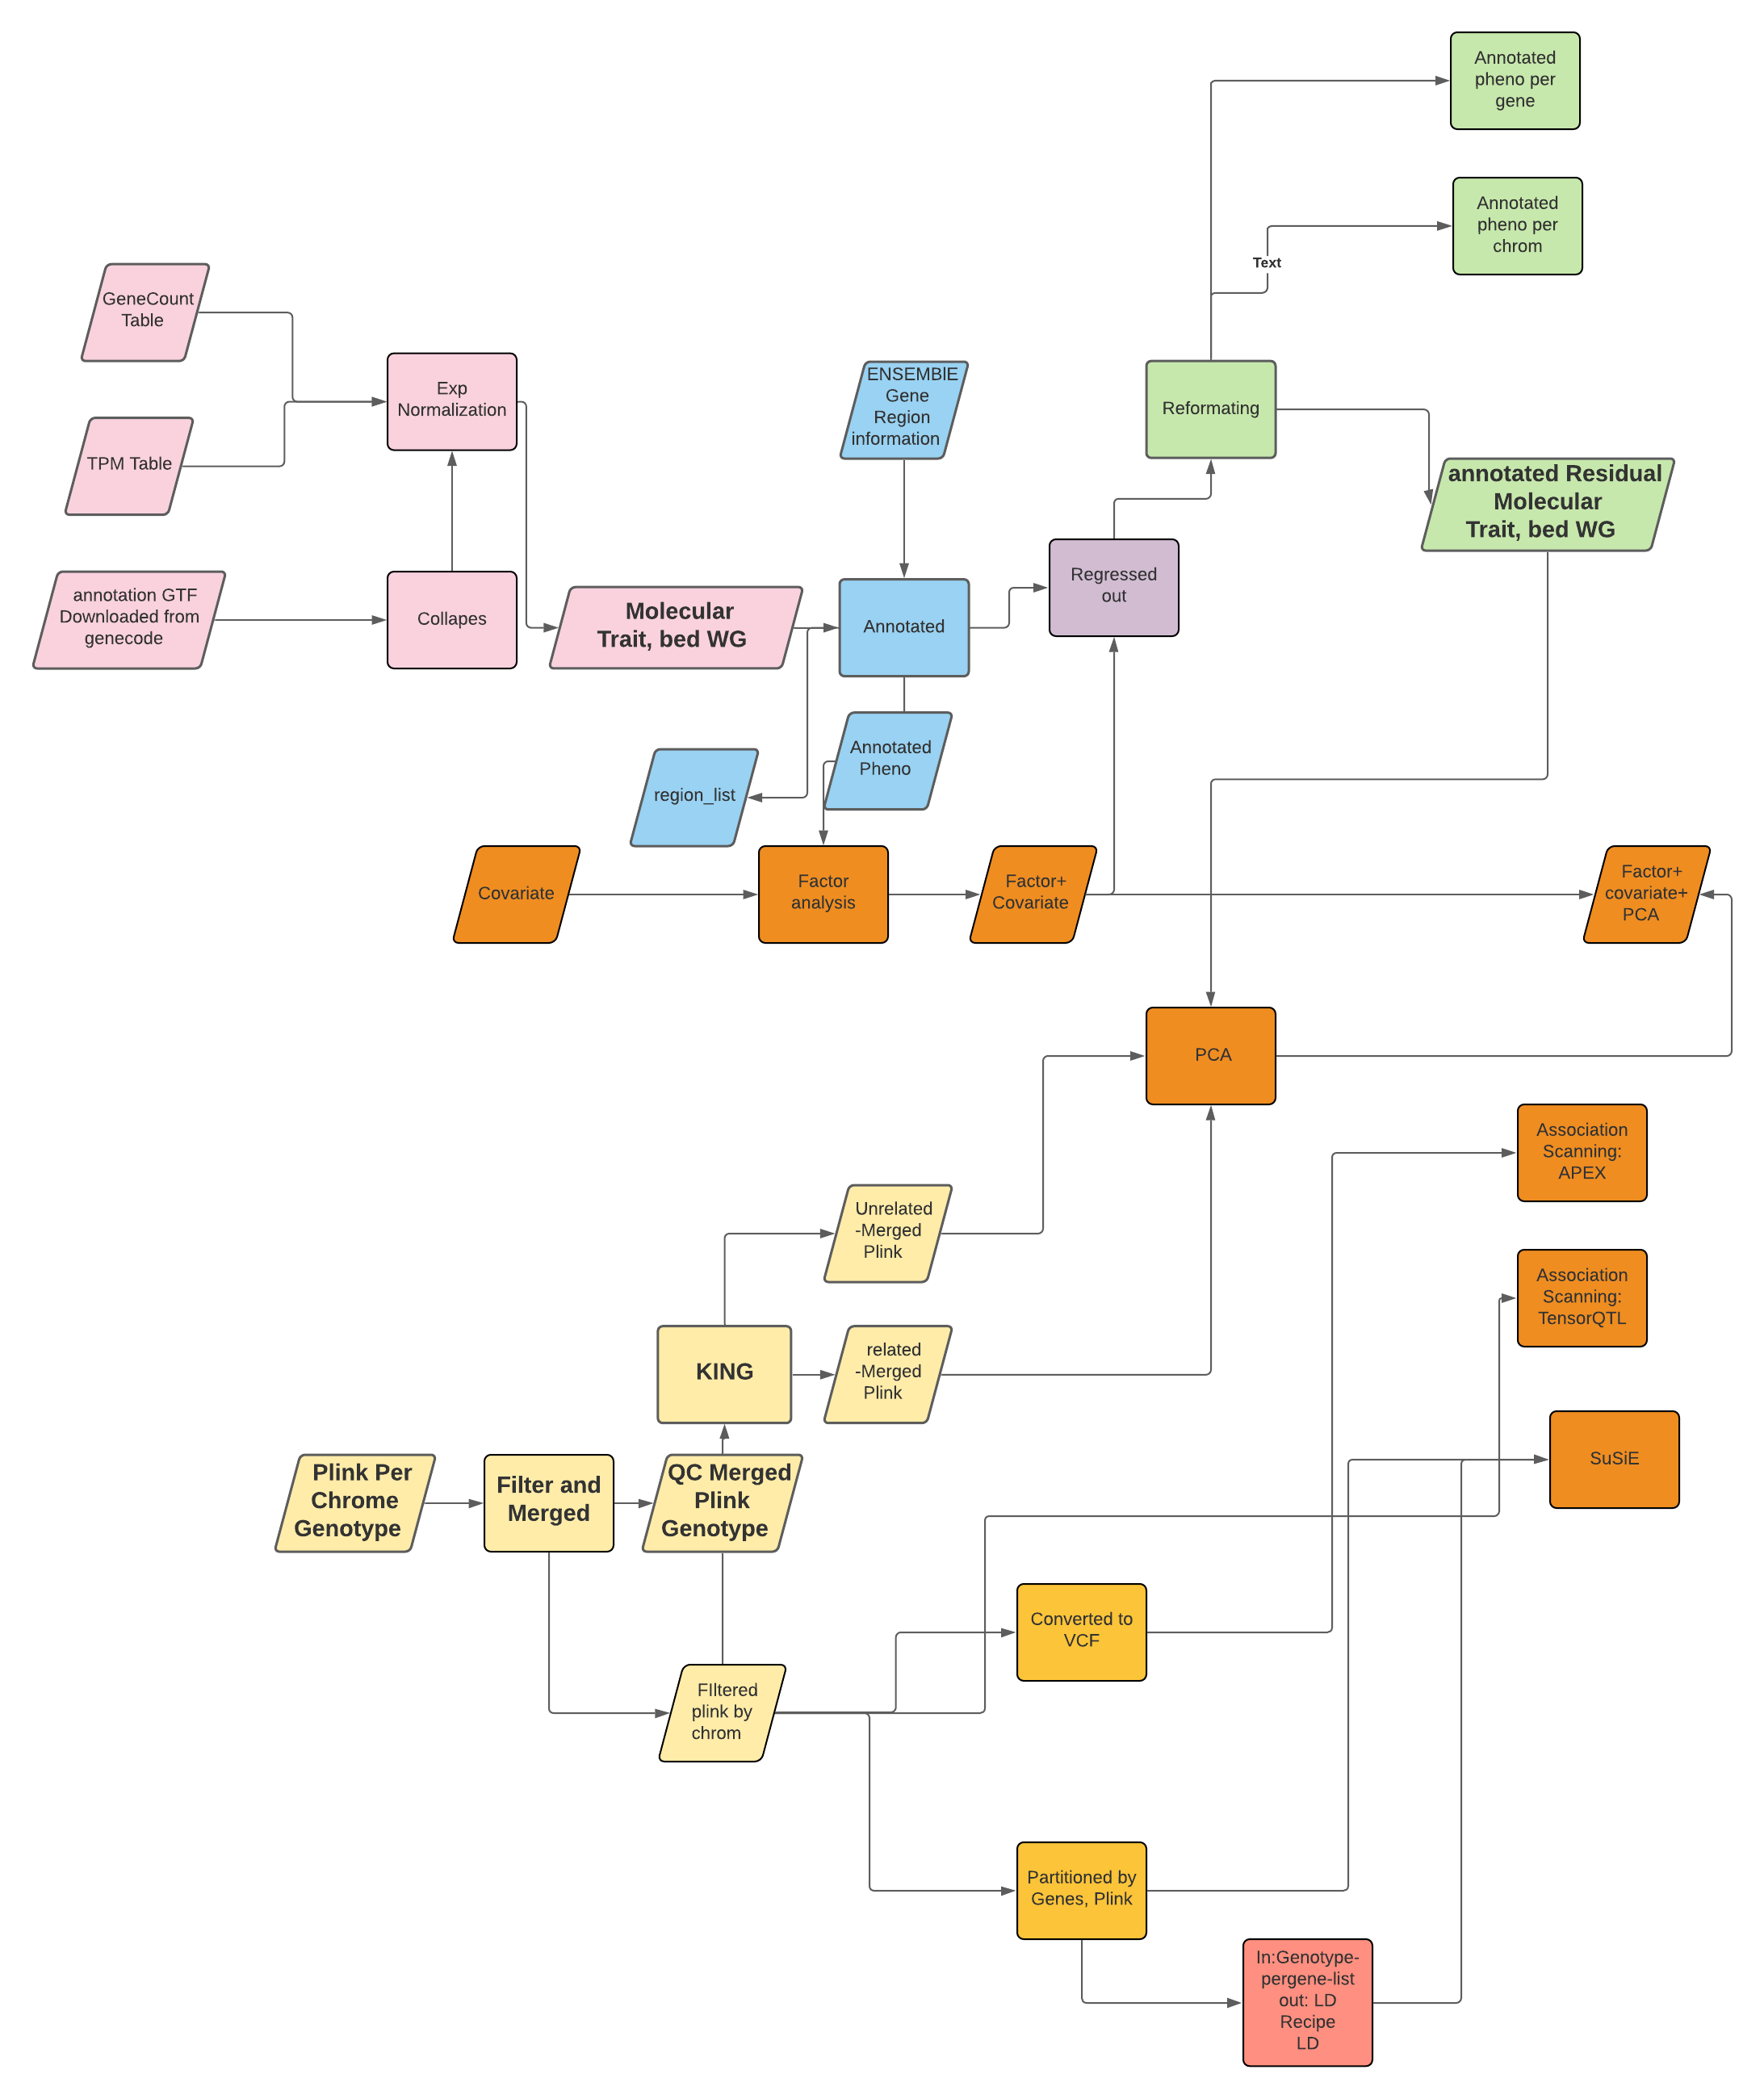

## Normalization (pink) 
(required the normalization docker from gou-29 due to the needed bgzip and tabix)
(can only work with the given input)

In [ ]:
cd /mnt/mfs/statgen/xqtl_workflow_testing/module/normailzation
sos run /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/phenotype/normalization.ipynb Normalization  \
--counts_gct "./geneCounts.gct"         --tpm_gct "./geneTpm.gct"        \
--vcf_chr_list "/mnt/mfs/statgen/xqtl_workflow_testing/expression_normalization/vcf_chrom_list"     \
--sample_participant_lookup "/mnt/mfs/statgen/xqtl_workflow_testing/expression_normalization/sampleSheetAfterQc.txt"      \
--name "demo"         --script_dir "/mnt/mfs/statgen/xqtl_workflow_testing/expression_normalization/" --wd ./       \
--annotation_gtf /mnt/mfs/statgen/xqtl_workflow_testing/expression_normalization/gencode.v26.annotation.gtf.gz  -s build &

## Annotation(Blue)
Ideally the input shall be the output of normalization, for the time being another similar file was used.

In [ ]:
nohup sos run /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/phenotype/annotation.ipynb annotation \
--molecular_pheno_whole /mnt/mfs/statgen/xqtl_workflow_testing/success_example/testing_10/Data_Processing/Phenotype/AC.mol_phe.bed  \
--wd /mnt/mfs/statgen/xqtl_workflow_testing/demo/annotation  \
--name "demo" --container "/mnt/mfs/statgen/containers/apex.sif" &

## Residual_Expression(Purple)
When wengou's residual expression ready, use his, for the timebeing this works

In [ ]:
nohup sos run /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/phenotype/Residual_Y.ipynb Residual_Expression \
--molecular_pheno_whole  /mnt/mfs/statgen/xqtl_workflow_testing/demo/annotation/AC.mol_phe.annotated.bed.gz \
--factor_covariate /mnt/mfs/statgen/xqtl_workflow_testing/success_example/testing_no_cov/Data_Processing/Factor_and_Covariate/AC.APEX.cov  \
--wd /mnt/mfs/statgen/xqtl_workflow_testing/demo/residual_Y/ \
--name "demo" --container "/mnt/mfs/statgen/containers/apex.sif" &

## Phenotype reformmating(Green)

In [ ]:
nohup sos run /home/hs3163/GIT/xqtl-pipeline/pipeline/data_preprocessing/phenotype/phenotype_formatting.ipynb reformat \
--region_list /home/hs3163/GIT/ADSPFG-xQTL/MWE/mwe_region_long \
--molecular_pheno_whole /mnt/mfs/statgen/xqtl_workflow_testing/demo/residual_Y/demo.mol_phe.resid.bed.gz  \
--wd /mnt/mfs/statgen/xqtl_workflow_testing/demo/phenotype_reformat/  \
--name "demo" --container "/mnt/mfs/statgen/containers/apex.sif" &